# Imports

In [1]:
!pwd
import sys
import os
import shutil

from bumps.names import *
from bumps.dream.state import load_state
import matplotlib.pyplot as plt

from molgroups.support import molstat

# always use the same testdata
shutil.copyfile('./bu/testdata.DAT', os.getcwd()+'/testdata.DAT')

/Users/frank/Dropbox/My Mac (PN115993.campus.nist.gov)/Documents/programming/molgroups/examples/information_theory/simulate_data/SASView


'/Users/frank/Dropbox/My Mac (PN115993.campus.nist.gov)/Documents/programming/molgroups/examples/information_theory/simulate_data/SASView/testdata.DAT'

# Create Short Example Fit

In [2]:
%%writefile testfit.py
import numpy

from bumps.names import *
from sasmodels.core import load_model
from sasmodels.bumps_model import Model, Experiment
from sasmodels.data import load_data, plot_data

# IMPORT THE DATA USED
data = load_data('testdata.DAT')

#setattr(data, 'qmin', 0.0)
#setattr(data, 'qmax', 10.0)

# DEFINE THE MODEL
kernel = load_model('ellipsoid@hayter_msa')

pars = dict(scale=6.4, background=0.06, sld=0.33, sld_solvent=2.15, radius_polar=14.0,
            radius_equatorial=24.0, volfraction=0.075, charge=66.373, temperature=298.0,
            concentration_salt=0.001, dielectconst=71.0)

model = Model(kernel, **pars)

# PARAMETER RANGES (ONLY THOSE PARAMETERS ARE FITTED)
model.scale.range(0, 60.)
model.background.range(0, 1)
model.sld.range(-2, 10)
model.sld_solvent.range(0, 5)
model.radius_polar.range(0, 10)
model.radius_equatorial.range(0, 25)
model.volfraction.range(0,0.1)
model.charge.range(0, 20)
model.temperature.range(0, 1000)
model.concentration_salt.range(0, 1)
model.dielectconst.range(0,100)

M = Experiment(data=data, model=model)
problem = FitProblem(M)

Overwriting testfit.py


# Variables

In [3]:
#Example is from https://github.com/SasView/sasmodels/tree/master/example

store = "T"
setupdir = os.getcwd()
runfile = "testfit"
fitsource = "SASView"

burn=50
steps=10

# Setup Example Fit

In [4]:
fitobj = molstat.CMolStat(
    fitsource=fitsource,
    spath=setupdir,
    mcmcpath=store,
    runfile=runfile,
    state=None,
    problem=None,
)

# steps: 10, # draws: 1100
step 1 cost 2339.939(52)
                              background |.........  0.0130243 in (0,1)
                                  charge |.........    1.43339 in (0,20)
                      concentration_salt ..|.......   0.200918 in (0,1)
                            dielectconst ...|......    32.9501 in (0,100)
                       radius_equatorial .........|    23.0615 in (0,25)
                            radius_polar .....|....    5.70044 in (0,10)
                                   scale ....|.....    25.2259 in (0,60)
                                     sld ....|.....    3.44578 in (-2,10)
                             sld_solvent ....|.....    2.24208 in (0,5)
                             temperature ........|.    855.347 in (0,1000)
                             volfraction ..|.......   0.022942 in (0,0.1)


/Users/frank/opt/anaconda3/envs/Python37/lib/python3.7/site-packages/bumps/dream/metropolis.py:20: RuntimeWarning: invalid value encountered in subtract
  return exp(minimum(logp_try-logp_old, 0)/BUMPS_TEMPERATURE)


step 15 cost 1303.159(52)
step 30 cost 1244.595(52)
step 46 cost 1225.586(52)
.background = 0.0186327 in [0,1]
.charge = 15.8373 in [0,20]
.concentration_salt = 0.956799 in [0,1]
.dielectconst = 78.3708 in [0,100]
.phi = 60
.phi_pd = 0
.phi_pd_n = 35
.phi_pd_nsigma = 3
.radius_effective = 20.75
.radius_effective_mode = 1
.radius_effective_pd = 0
.radius_effective_pd_n = 35
.radius_effective_pd_nsigma = 3
.radius_equatorial = 19.9582 in [0,25]
.radius_equatorial_pd = 0
.radius_equatorial_pd_n = 35
.radius_equatorial_pd_nsigma = 3
.radius_polar = 9.94262 in [0,10]
.radius_polar_pd = 0
.radius_polar_pd_n = 35
.radius_polar_pd_nsigma = 3
.scale = 26.0865 in [0,60]
.sld = 5.86754 in [-2,10]
.sld_M0 = 0
.sld_mphi = 0
.sld_mtheta = 0
.sld_solvent = 4.07353 in [0,5]
.sld_solvent_M0 = 0
.sld_solvent_mphi = 0
.sld_solvent_mtheta = 0
.structure_factor_mode = 0
.temperature = 546.296 in [0,1000]
.theta = 60
.theta_pd = 0
.theta_pd_n = 35
.theta_pd_nsigma = 3
.up_angle = 0
.up_frac_f = 0
.up_frac_i

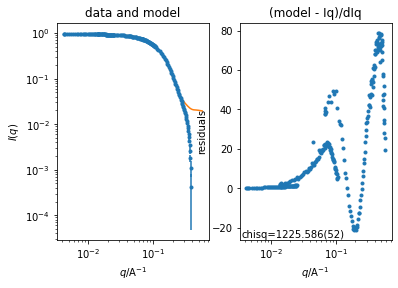

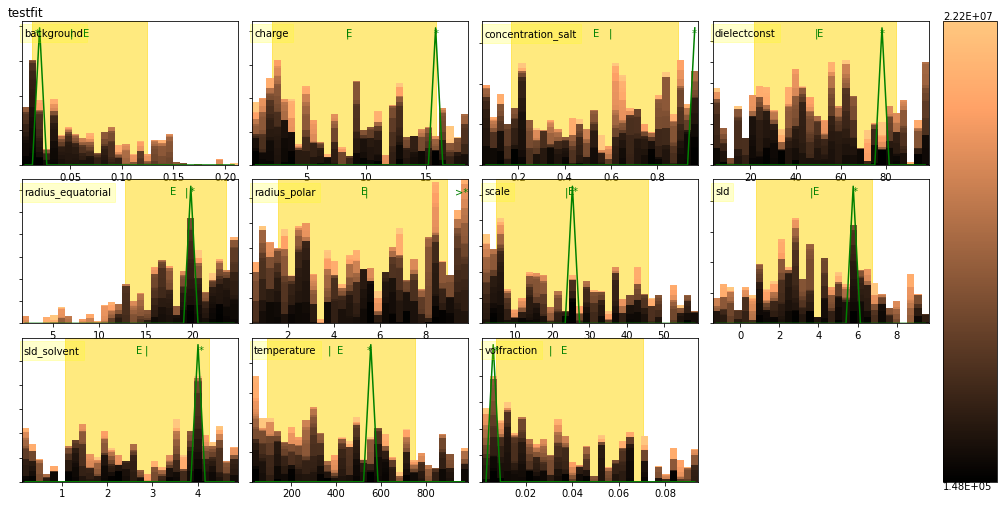

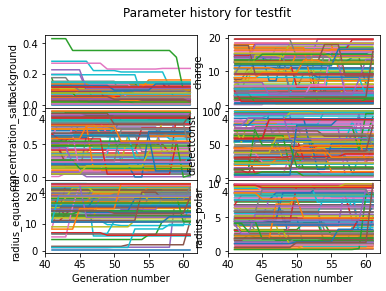

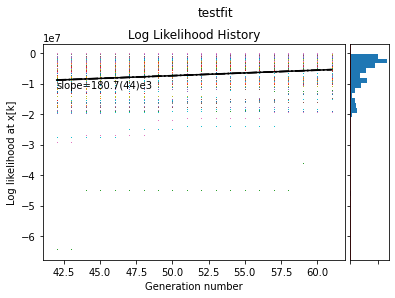

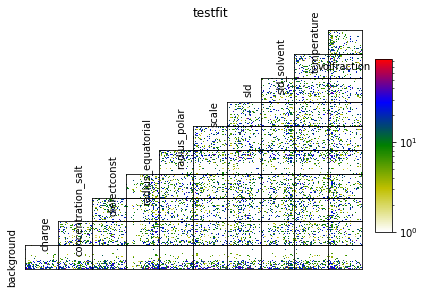

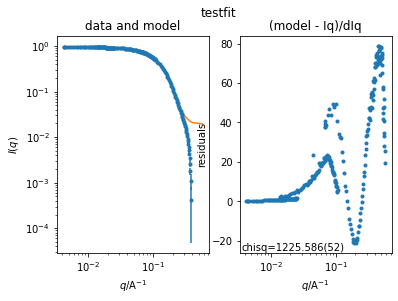

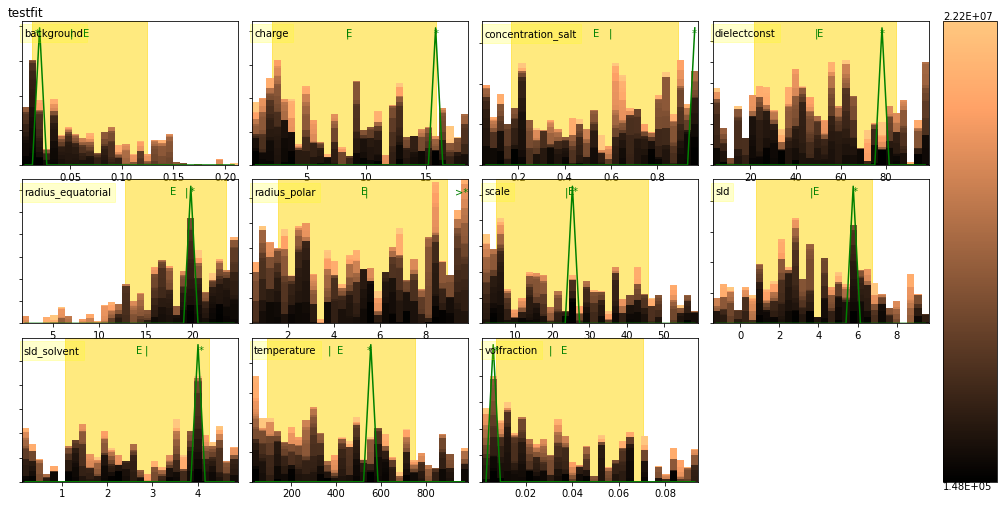

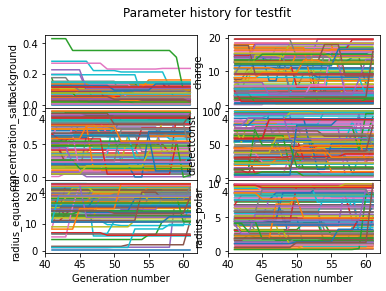

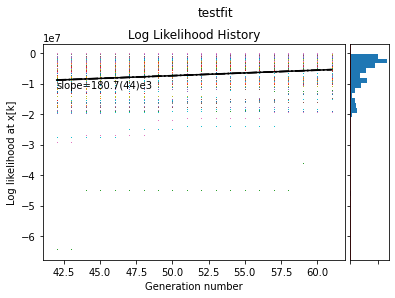

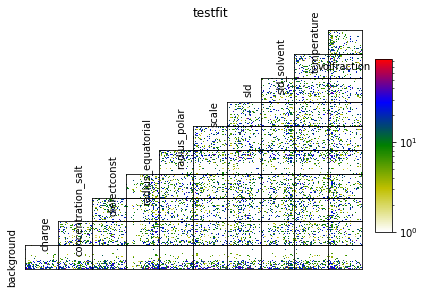

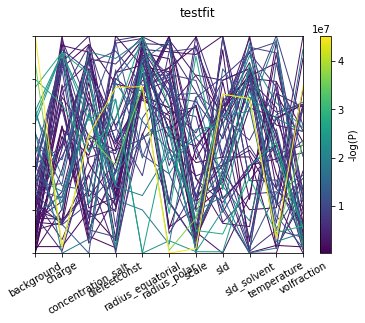

In [5]:
fitobj.Interactor.fnRunMCMC(burn, steps, batch=False)

In [6]:
%%writefile simpar.dat
background 0.000
charge 14.76
concentration_salt 0.696339
dielectconst 45.5778
radius_equatorial 19.7316
radius_polar 6.57747
scale  48.1448
sld  8.02574
sld_solvent  1.89502
temperature  409.473
volfraction 0.0000497263

Overwriting simpar.dat


In [7]:
configuration_dataset1 = [{'lambda': 6.0, "detector_sample_distance": 100, 'time': 1200},
                          {'lambda': 6.0, "detector_sample_distance": 400, 'time': 3200},
                          {'lambda': 6.0, "detector_sample_distance": 1300, 'time': 4200}]

configuration = [configuration_dataset1]

fitobj.fnSimulateData(basefilename='testdata.DAT', liConfigurations=configuration)

background 0.0
charge 14.76
concentration_salt 0.696339
dielectconst 45.5778
radius_equatorial 19.7316
radius_polar 6.57747
scale 48.1448
sld 8.02574
sld_solvent 1.89502
temperature 409.473
volfraction 4.97263e-05
background 0.0
charge 14.76
concentration_salt 0.696339
dielectconst 45.5778
radius_equatorial 19.7316
radius_polar 6.57747
scale 48.1448
sld 8.02574
sld_solvent 1.89502
temperature 409.473
volfraction 4.97263e-05


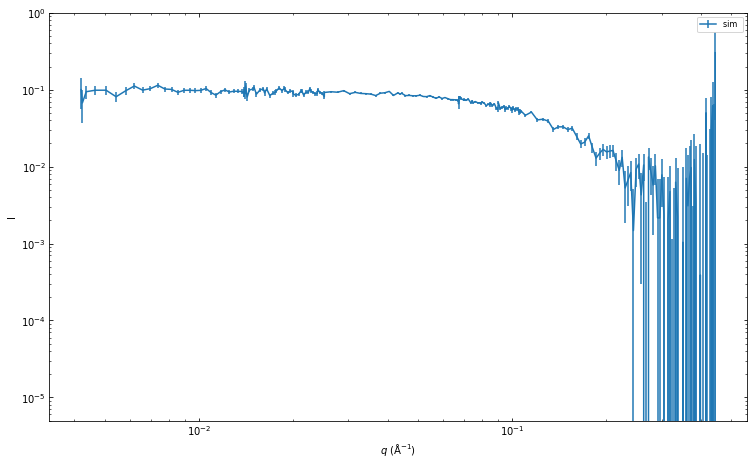

In [8]:
import pandas

fig, ax = plt.subplots()

#i = 0
#while os.path.isfile('testdata.DAT'):
simdata = pandas.read_csv('testdata.DAT', sep=' ', skip_blank_lines=True,comment='#')
ax.errorbar(simdata['Q'], simdata['I'], simdata['dI'], label="sim ")
#i += 1

ax.legend(fontsize=8)
ax.set_ylabel("I", fontsize=10)
ax.set_yscale('log')
ax.set_xscale('log')
ax.minorticks_on()
ax.tick_params(which="both", direction="in", labelsize=10)
ax.tick_params(bottom=True, top=True, left=True, right=True, which="both")
ax.set_xlabel("$q$ (Å$^{-1}$)", fontsize=10)
ax.figure.set_size_inches(12.5, 7.5)
ax.set_ylim(5e-6, 1)
plt.savefig(store + "/model_comparison.png", facecolor="white")
plt.show()
